In [1]:
import glob
import sys

import numpy as np
import pandas as pd
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from tensorflow.keras.layers import Dropout, Dense, Input
sys.path.append("../../")

from helpers.experiment import experiment


/usr/local/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')




Commencing Experiment: SVC_dataset_00_all

PCA pre_processing started
PCA pre_processing completed
Training accuracy: train_accuracy = 0.812083

/Users/dcollins/berkeley-mids/music_genre_group_207/member_workspaces/danny/../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.7386  0.7417    0.7401      240  0.7112
  genre_classical     0.8629  0.8917    0.8770      240  0.8633
    genre_country     0.8879  0.7917    0.8370      240  0.8217
      genre_disco     0.8022  0.8958    0.8465      240  0.8299
     genre_hiphop     0.8640  0.9000    0.8816      240  0.8684
       genre_jazz     0.8439  0.8333    0.8386      240  0.8208
      genre_metal     0.8548  0.8583    0.8565      240  0.8406
        genre_pop     0.7583  0.6667    0.7095      240  0.6813
     genre_reggae     0.8436  0.8542    0.8489      240  0.8320
   

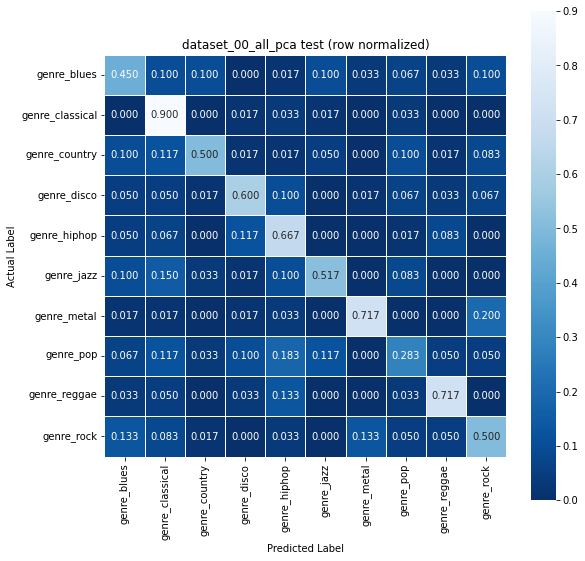

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}


In [23]:

dataset = '../../datasets/dataset_00_all.pickle'

n_components=None
model_SVC = SVC(class_weight='balanced',probability=True)
ex_SVC = experiment(
    model_SVC,
    dataset,
    result_filename="rich_results.json",
    samples_per_genre=300,
    pca_components=0.95
    
)

print(ex_SVC['class_weight'])

# model_fit_call_fn=lambda model,X_train,y_train,class_weight: model.fit(X_train, y_train)



Commencing Experiment: XGBClassifier_dataset_00_all

Training accuracy: train_accuracy = 0.917917

/Users/dcollins/berkeley-mids/music_genre_group_207/member_workspaces/danny/../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     0.9605  0.9125    0.9359      240  0.9294
  genre_classical     0.8941  0.9500    0.9212      240  0.9127
    genre_country     0.9559  0.9042    0.9293      240  0.9222
      genre_disco     0.8828  0.9417    0.9113      240  0.9017
     genre_hiphop     0.9141  0.9750    0.9435      240  0.9377
       genre_jazz     0.9449  0.9292    0.9370      240  0.9301
      genre_metal     0.8943  0.9167    0.9053      240  0.8948
        genre_pop     0.9641  0.8958    0.9287      240  0.9219
     genre_reggae     0.9280  0.9125    0.9202      240  0.9114
       genre_rock     0.8523  0.8417    0.8470   

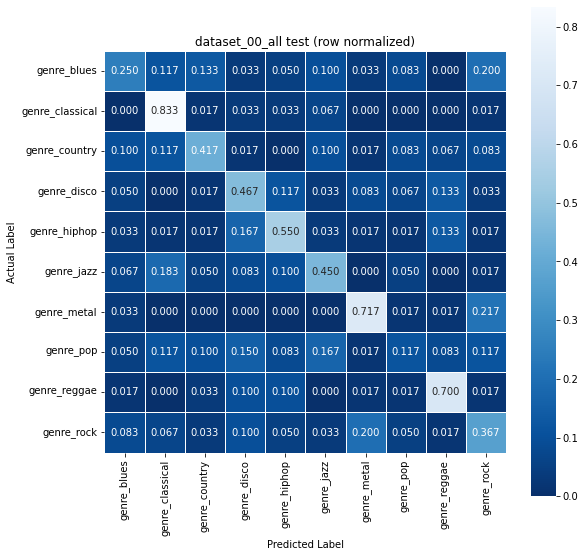

In [24]:
model_XGB = XGBClassifier(
        use_label_encoder=False,
        tree_method='hist', 
        eta=.05,
        max_depth=6,
        reg_alpha=10,
        sampling_method='gradient_based',
        objective="multi:softprob", 
        eval_metric="mlogloss",
)
ex_XGB = experiment(
    model=model_XGB,
    dataset=dataset,
    pca_components=n_components,
    result_filename="rich_results.json",
    X_train_std=ex_SVC['X_train_std'],
    X_test_std=ex_SVC['X_test_std'],
    y_train=ex_SVC['y_train'],
    y_test=ex_SVC['y_test'],
    label_encoder=ex_SVC['label_encoder']
)



Commencing Experiment: KNeighborsClassifier_dataset_00_all

Training accuracy: train_accuracy = 1.000000

/Users/dcollins/berkeley-mids/music_genre_group_207/member_workspaces/danny/../../results/rich_results.json
file exist, reading json
record saved
                   precision  recall  f1-score  support     mcc
                                                               
      genre_blues     1.0000  1.0000    1.0000      240  1.0000
  genre_classical     1.0000  1.0000    1.0000      240  1.0000
    genre_country     1.0000  1.0000    1.0000      240  1.0000
      genre_disco     1.0000  1.0000    1.0000      240  1.0000
     genre_hiphop     1.0000  1.0000    1.0000      240  1.0000
       genre_jazz     1.0000  1.0000    1.0000      240  1.0000
      genre_metal     1.0000  1.0000    1.0000      240  1.0000
        genre_pop     1.0000  1.0000    1.0000      240  1.0000
     genre_reggae     1.0000  1.0000    1.0000      240  1.0000
       genre_rock     1.0000  1.0000    1.

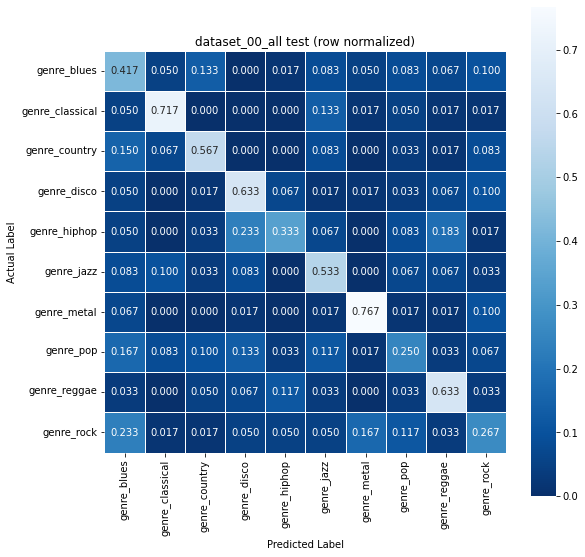

In [25]:
model_KNN = KNeighborsClassifier(n_neighbors=3,weights='distance')
ex_KNN = experiment(
    model=model_KNN,
    dataset=dataset,
    pca_components=n_components,
    result_filename="rich_results.json",
    X_train_std=ex_SVC['X_train_std'],
    X_test_std=ex_SVC['X_test_std'],
    y_train=ex_SVC['y_train'],
    y_test=ex_SVC['y_test'],
    label_encoder=ex_SVC['label_encoder']
)

In [5]:
pd.read_pickle('../../datasets/dataset_01_mean.pickle')

,mfcc_mean_0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,...,genre_blues,genre_classical,genre_country,genre_disco,genre_hiphop,genre_jazz,genre_metal,genre_pop,genre_reggae,genre_rock
11,-646.231445,111.854805,19.008308,16.829792,0.384627,-0.737740,-3.406654,4.369300,-2.526016,4.839982,...,0,0,0,0,0,0,0,0,1,0
13,-765.565979,178.684052,-26.383612,5.345988,-13.608403,-17.391293,-20.750830,-7.267175,-11.232429,-11.701081,...,0,1,0,0,0,0,0,0,0,0
14,-658.642700,112.548470,15.934329,17.882261,-1.357603,13.185078,-2.982529,4.172069,-0.221640,-1.373562,...,0,0,0,0,0,0,0,0,1,0
15,-774.882141,163.441223,56.226765,26.311859,9.883611,8.146501,2.419113,9.639036,-2.464165,0.318586,...,0,0,0,0,0,0,0,1,0,0
16,-609.905518,79.316460,22.191978,33.732761,13.227217,-3.533257,3.880107,9.074506,-10.473398,3.426618,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55196,-677.128967,112.194321,-2.356055,27.138754,-4.340651,-1.145098,3.741500,4.097663,7.800027,4.520276,...,1,0,0,0,0,0,0,0,0,0
55205,-657.834778,104.840073,23.781740,18.864958,5.405090,3.316004,2.755989,6.786467,-0.963619,4.307145,...,0,0,0,0,1,0,0,0,0,0
55207,-762.701416,174.228287,3.216133,9.339471,-2.972456,-4.029442,-8.040684,-3.637555,-3.809685,-1.340430,...,0,1,0,0,0,0,0,0,0,0
55208,-671.603333,117.805748,-22.434090,17.718218,2.330396,-4.240941,-9.629152,3.024223,6.413898,9.106426,...,0,0,0,0,1,0,0,0,0,0


In [6]:
#model_GMM = GaussianMixture(n_components=10,verbose=1,max_iter=100,
              # init_params='k-means' #{‘kmeans’, ‘k-means++’, ‘random’, ‘random_from_data’},
#)
#ex_GMM=experiment(model_GMM, dataset, pca_components=100, result_filename="rich_results.json")



In [26]:
svc_X_train_raw = ex_SVC['model'].predict_proba(ex_SVC['X_train_std'])
svc_X_test_raw = ex_SVC['model'].predict_proba(ex_SVC['X_test_std'])

In [27]:
xgb_X_train_raw = ex_XGB['model'].predict(ex_SVC['X_train_std'],output_margin=True)
xgb_X_test_raw = ex_XGB['model'].predict(ex_SVC['X_test_std'],output_margin=True)

In [28]:
knn_X_train_raw = ex_KNN['model'].predict_proba(ex_SVC['X_train_std'])
knn_X_test_raw = ex_KNN['model'].predict_proba(ex_SVC['X_test_std'])

In [59]:
svc_pca = -1
xgb_pca = -1
knn_pca = -1

def PCAify(tr,ts,pca_components):
    if(pca_components > 0):
        pca = PCA(n_components=pca_components)
        tr = pca.fit_transform(tr)
        ts = pca.transform(ts)
    return (tr,ts)

svc_X_train,svc_X_test = PCAify(svc_X_train_raw,svc_X_test_raw,svc_pca)
xgb_X_train,xgb_X_test = PCAify(xgb_X_train_raw,xgb_X_test_raw,xgb_pca)
knn_X_train,knn_X_test = PCAify(knn_X_train_raw,knn_X_test_raw,knn_pca)


(2400, 10)

In [65]:

class_weight={
    i: c
    for i, c in enumerate(
        compute_class_weight(
            class_weight="balanced",
            classes=ex_SVC['label_encoder'].transform(ex_SVC['label_encoder'].classes_),
            y=ex_SVC['y_train'],
        )
    )
}


svc_input = Input(shape=(np.shape(svc_X_train)[1],),dtype=tf.float32,name="SVC Input")
xgb_input = Input(shape=(np.shape(xgb_X_train)[1],),dtype=tf.float32,name="XGB Input")
knn_input = Input(shape=(np.shape(knn_X_train)[1],),dtype=tf.float32,name="KNN Input")
joined_input = tf.keras.layers.Concatenate()([svc_input,xgb_input,knn_input])
hidden_1 = tf.keras.layers.Dense(units=5,activation='relu',name='hidden1')(joined_input)
hidden_2 = tf.keras.layers.Dense(units=5,activation='relu',name='hidden2')(Dropout(0.9)(hidden_1))
genre = tf.keras.layers.Dense(units=10,activation='softmax')(Dropout(0.9)(hidden_2))
model = tf.keras.Model(inputs=[svc_input,xgb_input,knn_input],outputs=genre)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss='sparse_categorical_crossentropy',     
    optimizer=optimizer, 
    metrics=['accuracy']
)

model.fit(
    x={
        'SVC Input':svc_X_train,
        'XGB Input':xgb_X_train,
        'KNN Input':knn_X_train
    },
    class_weight=class_weight,
    y=ex_SVC['y_train'],
    batch_size=16,
    epochs=100,
    validation_data=({
        'SVC Input':svc_X_test,
        'XGB Input':xgb_X_test,
        'KNN Input':knn_X_test
    },ex_SVC['y_test'])
)

Epoch 1/100
150/150 [==============================] - 1s 3ms/step - loss: 2.9119 - accuracy: 0.0917 - val_loss: 2.3429 - val_accuracy: 0.0767
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 2.9295 - accuracy: 0.0879 - val_loss: 2.3092 - val_accuracy: 0.0750
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 2.5875 - accuracy: 0.0975 - val_loss: 2.3008 - val_accuracy: 0.0850
Epoch 4/100
150/150 [==============================] - 0s 1ms/step - loss: 2.4729 - accuracy: 0.0958 - val_loss: 2.2981 - val_accuracy: 0.1150
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 2.4973 - accuracy: 0.0938 - val_loss: 2.2962 - val_accuracy: 0.1200
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 2.4038 - accuracy: 0.0979 - val_loss: 2.2953 - val_accuracy: 0.1233
Epoch 7/100
150/150 [==============================] - 0s 1ms/step - loss: 2.3837 - accuracy: 0.0988 - val_loss: 2.2982 - val_accuracy: 0.1250

Epoch 58/100
150/150 [==============================] - 0s 1ms/step - loss: 2.2955 - accuracy: 0.0962 - val_loss: 2.2839 - val_accuracy: 0.1583
Epoch 59/100
150/150 [==============================] - 0s 1ms/step - loss: 2.2884 - accuracy: 0.0938 - val_loss: 2.2750 - val_accuracy: 0.1617
Epoch 60/100
150/150 [==============================] - 0s 1ms/step - loss: 2.2825 - accuracy: 0.1025 - val_loss: 2.2749 - val_accuracy: 0.1667
Epoch 61/100
150/150 [==============================] - 0s 1ms/step - loss: 2.2886 - accuracy: 0.1033 - val_loss: 2.2775 - val_accuracy: 0.1750
Epoch 62/100
150/150 [==============================] - 0s 1ms/step - loss: 2.2867 - accuracy: 0.0950 - val_loss: 2.2765 - val_accuracy: 0.1733
Epoch 63/100
150/150 [==============================] - 0s 2ms/step - loss: 2.2838 - accuracy: 0.0942 - val_loss: 2.2734 - val_accuracy: 0.1783
Epoch 64/100
150/150 [==============================] - 0s 1ms/step - loss: 2.2926 - accuracy: 0.0983 - val_loss: 2.2783 - val_accuracy:

In [69]:
merged_pca_count=10
merged_X_train_raw = np.concatenate([
    svc_X_train_raw,
    xgb_X_train_raw,
    knn_X_train_raw
],axis=1)
merged_X_test_raw = np.concatenate([
    svc_X_test_raw,
    xgb_X_test_raw,
    knn_X_test_raw
],axis=1)
merged_X_train, merged_X_test = PCAify(merged_X_train_raw,merged_X_test_raw,0.95)

# merged_X_train = np.concatenate([
#     svc_X_train,
#     xgb_X_train,
#     knn_X_train
# ],axis=1)
# merged_X_test = np.concatenate([
#     svc_X_test,
#     xgb_X_test,
#     knn_X_test
# ],axis=1)

np.shape(merged_X_train)

(2400, 9)

In [68]:
merged_input = Input(shape=(np.shape(merged_X_train)[1],),dtype=tf.float32,name="Merged Input")

# joined_input = tf.keras.layers.Concatenate()([svc_input,xgb_input,knn_input])
hidden_1 = Dense(units=10,activation='relu',name='hidden1')(merged_input)
hidden_2 = Dense(units=10,activation='relu',name='hidden2')(Dropout(0.2)(hidden_1))
hidden_3 = Dense(units=10,activation='relu',name='hidden3')(Dropout(0.2)(hidden_2))
genre = Dense(units=10,activation='softmax')(Dropout(0.5)(hidden_3))
model = tf.keras.Model(inputs=[merged_input],outputs=genre)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    loss='sparse_categorical_crossentropy',     
    optimizer=optimizer, 
    metrics=['accuracy']
)

model.fit(
    x={
        'Merged Input':merged_X_train,
        #'XGB Input':xgb_X_train,
        #'KNN Input':knn_X_train
    },
    class_weight=class_weight,
    y=ex_SVC['y_train'],
    batch_size=4,
    epochs=20,
    validation_data=({
        'Merged Input':merged_X_test,
        #'XGB Input':xgb_X_test,
        #'KNN Input':knn_X_test
    },ex_SVC['y_test'])
)

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 1.7452 - accuracy: 0.3429 - val_loss: 1.8421 - val_accuracy: 0.4400
Epoch 2/20
600/600 [==============================] - 1s 1ms/step - loss: 1.3894 - accuracy: 0.4796 - val_loss: 1.8980 - val_accuracy: 0.4433
Epoch 3/20
600/600 [==============================] - 1s 1ms/step - loss: 1.3823 - accuracy: 0.4729 - val_loss: 1.8876 - val_accuracy: 0.4333
Epoch 4/20
600/600 [==============================] - 1s 1ms/step - loss: 1.2871 - accuracy: 0.5325 - val_loss: 2.0910 - val_accuracy: 0.4300
Epoch 5/20
600/600 [==============================] - 1s 1ms/step - loss: 1.3423 - accuracy: 0.5267 - val_loss: 2.0206 - val_accuracy: 0.4450
Epoch 6/20
600/600 [==============================] - 1s 1ms/step - loss: 1.2778 - accuracy: 0.5496 - val_loss: 2.1575 - val_accuracy: 0.4283
Epoch 7/20
600/600 [==============================] - 1s 1ms/step - loss: 1.3069 - accuracy: 0.5575 - val_loss: 2.1384 - val_accuracy: 0.4233
Epoch 

In [9]:

pdf = pd.DataFrame(data={
    'svc_pred':ex_SVC['y_test_pred'],
    'xgb_pred':ex_XGB['y_test_pred'],
    'knn_pred':ex_KNN['y_test_pred'],
    'y_true':ex_SVC['y_test']
})
# pdf['p1correct'] = pdf['pred1']==pdf['y_true']
# pdf['p2correct'] = pdf['pred2']==pdf['y_true']
# pdf['pagree'] = pdf['pred1']==pdf['pred2']
# pdf['p1or2correct'] = pdf['p1correct'] | pdf['p2correct']

pdf['svc_pred_correct'] = pdf.apply(lambda x: 1 if x['svc_pred'] == x['y_true'] else 0,axis=1)
pdf['xgb_pred_correct'] = pdf.apply(lambda x: 1 if x['xgb_pred'] == x['y_true'] else 0,axis=1)
pdf['knn_pred_correct'] = pdf.apply(lambda x: 1 if x['knn_pred'] == x['y_true'] else 0,axis=1)

pdf['pct_correct'] = (pdf['svc_pred_correct'] + pdf['xgb_pred_correct'] + pdf['knn_pred_correct'] ) / 3

# pdf.groupby(['svc_pred_correct','xgb_pred_correct','knn_pred_correct']).count()

pdf

,svc_pred,xgb_pred,knn_pred,y_true,svc_pred_correct,xgb_pred_correct,knn_pred_correct,pct_correct
0,3,7,9,9,0,0,1,0.333333
1,1,1,1,7,0,0,0,0.000000
2,1,1,1,1,1,1,1,1.000000
3,9,9,9,9,1,1,1,1.000000
4,5,5,4,5,1,1,0,0.666667
...,...,...,...,...,...,...,...,...
4266,6,9,9,6,1,0,0,0.333333
4267,1,1,1,1,1,1,1,1.000000
4268,5,7,7,7,0,1,1,0.666667
4269,7,7,7,7,1,1,1,1.000000


In [10]:
pdf.groupby(['svc_pred_correct','xgb_pred_correct','knn_pred_correct']).count()

svc_pred  xgb_pred  \
svc_pred_correct xgb_pred_correct knn_pred_correct                       
0                0                0                      840       840   
                                  1                      290       290   
                 1                0                      323       323   
                                  1                      438       438   
1                0                0                      240       240   
                                  1                      192       192   
                 1                0                      360       360   
                                  1                     1588      1588   

                                                    knn_pred  y_true  \
svc_pred_correct xgb_pred_correct knn_pred_correct                     
0                0                0                      840     840   
                                  1                      290     290   
                 1                0                      323     323   
                                  1                      438     438   
1                0                0                      240     240   
                                  1                      192     192   
                 1                0                      360     360   
                                  1                     1588    1588   

                                                    pct_correct  
svc_pred_correct xgb_pred_correct knn_pred_correct               
0                0                0                         840  
                                  1                         290  
                 1                0                         323  
                                  1                         438  
1                0                0                         240  
                                  1                         192  
                 1                0                         360  
                                  1                        1588